In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests
import time

In [2]:
# Import the datetime module from the datetime library.
from datetime import datetime

# Import the API key and lat-lon to City Name CitiPy
from config import weather_api_key
from citipy import citipy

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [3]:
# Starting URL for Weather Map API Call.
#setting value for number of calls, (to check code with smaller set and avoid hitting API limitations)
NUM_CALLS=1500

params = {"units": "Imperial",
    "APPID": weather_api_key,
    "q": "Boston"} #q is city
#params
#base_url = "https://jsonplaceholder.typicode.com/" #Dummy placeholder, exceeded limit for a 60 calls a minute
base_url = "http://api.openweathermap.org/data/2.5/weather"



In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=NUM_CALLS)
lngs = np.random.uniform(low=-180.000, high=180.000, size=NUM_CALLS)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
#coordinates
# Create a list for holding the cities.
cities = []
failed_cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [6]:
# Create an empty list to hold the weather data.
city_data = []
skipped_cities = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [7]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(65) #Need to sleep 60 seconds so calls don't stop
    # Create endpoint URL with each city.
    #city_url = base_url + "&q=" + city.replace(" ","+") needing + is deprecated, using dictionary of params
    params['q'] = city
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(base_url, params).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print(f"{city.title()} not found. Skipping...")
        skipped_cities.append({"City": city.title(),
            "Coords": coordinates[(set_count-1)*10+record_count-1]})
        #pass We are catching errors, commenting out pass!

    # Indicate that Data Loading is complete.
    print("-----------------------------")
    print("Data Retrieval Complete      ")
    print("-----------------------------")

Processing Record 1 of Set 1 | butaritari
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 1 | coquimbo
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 1 | norman wells
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 1 | hofn
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 1 | ushuaia
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 1 | palabuhanratu
Palabuhanratu not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 1 | atuona
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 8 of Set 1 | albany
-----------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 2 | hermanus
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 2 | tuatapere
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 17 of Set 2 | kapaa
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 18 of Set 2 | samusu
Samusu not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 19 of Set 2 | prabumulih
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 20 of Set 2 | kalaleh
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 21 of Set 2 | payao
-----------------------------
Data Retrieval Complete      

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 28 of Set 3 | gorontalo
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 29 of Set 3 | taolanaro
Taolanaro not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 30 of Set 3 | karkaralinsk
Karkaralinsk not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 31 of Set 3 | beringovskiy
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 32 of Set 3 | plettenberg bay
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 33 of Set 3 | lebu
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 34 of Set 3 | ozernovski

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 40 of Set 4 | la peca
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 41 of Set 4 | lamu
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 42 of Set 4 | fort nelson
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 43 of Set 4 | san ramon
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 44 of Set 4 | bilibino
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 45 of Set 4 | umzimvubu
Umzimvubu not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 46 of Set 4 | fortuna
-----------------------------
Data Retrieval Comple

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 6 | kangaatsiaq
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 6 | arlit
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 6 | odweyne
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 6 | mayumba
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 6 | grindavik
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 8 of Set 6 | batemans bay
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 9 of Set 6 | pacific grove
-----------------------------
Data Retrieval Complete      
----------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 7 | aykhal
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 7 | pundaguitan
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 17 of Set 7 | nanortalik
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 18 of Set 7 | coari
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 19 of Set 7 | viransehir
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 20 of Set 7 | kabinda
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 21 of Set 7 | rio gallegos
-----------------------------
Data Retrieval Complete      
------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 28 of Set 8 | porto novo
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 29 of Set 8 | mareeba
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 30 of Set 8 | tala
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 31 of Set 8 | da nang
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 32 of Set 8 | balikpapan
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 33 of Set 8 | beidao
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 34 of Set 8 | paamiut
-----------------------------
Data Retrieval Complete      
----------------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 40 of Set 9 | methoni
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 41 of Set 9 | samarai
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 42 of Set 9 | zhuzhou
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 43 of Set 9 | mayo
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 44 of Set 9 | sabang
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 45 of Set 9 | pitimbu
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 46 of Set 9 | chapais
-----------------------------
Data Retrieval Complete      
-----------------------------
Proc

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 11 | nhulunbuy
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 11 | jishou
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 11 | ambanja
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 11 | tateyama
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 11 | esna
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 11 | atasu
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 8 of Set 11 | kushima
-----------------------------
Data Retrieval Complete      
-----------------------------
Pro

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 12 | kahramanmaras
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 12 | numan
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 12 | amberley
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 17 of Set 12 | las vegas
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 18 of Set 12 | cao bang
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 19 of Set 12 | cumaribo
Cumaribo not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 20 of Set 12 | nuuk
-----------------------------
Data Retrieval 

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 25 of Set 13 | phalodi
-----------------------------
Data Retrieval Complete      
-----------------------------


In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.0707,172.7902,80.92,79,18,12.08,KI,2021-03-28 13:43:59
1,Coquimbo,-29.9533,-71.3436,59.00,82,90,5.75,CL,2021-03-28 13:43:59
2,Norman Wells,65.2820,-126.8329,-0.40,71,75,17.27,CA,2021-03-28 13:43:59
3,Hofn,64.2539,-15.2082,35.60,69,75,19.57,IS,2021-03-28 13:44:00
4,Ushuaia,-54.8000,-68.3000,44.60,65,40,29.93,AR,2021-03-28 13:39:23
5,Atuona,-9.8000,-139.0333,80.92,71,100,18.48,PF,2021-03-28 13:44:00
6,Albany,42.6001,-73.9662,50.00,70,100,15.08,US,2021-03-28 13:44:00
7,Avarua,-21.2078,-159.7750,80.60,83,75,16.11,CK,2021-03-28 13:44:00
8,Carnarvon,-24.8667,113.6333,78.80,89,1,6.91,AU,2021-03-28 13:44:01
9,Salalah,17.0151,54.0924,87.80,48,0,6.91,OM,2021-03-28 13:44:01


In [9]:
new_column_order = ["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Butaritari,18,KI,2021-03-28 13:43:59,79,3.0707,172.7902,80.92,12.08
1,Coquimbo,90,CL,2021-03-28 13:43:59,82,-29.9533,-71.3436,59.00,5.75
2,Norman Wells,75,CA,2021-03-28 13:43:59,71,65.2820,-126.8329,-0.40,17.27
3,Hofn,75,IS,2021-03-28 13:44:00,69,64.2539,-15.2082,35.60,19.57
4,Ushuaia,40,AR,2021-03-28 13:39:23,65,-54.8000,-68.3000,44.60,29.93
5,Atuona,100,PF,2021-03-28 13:44:00,71,-9.8000,-139.0333,80.92,18.48
6,Albany,100,US,2021-03-28 13:44:00,70,42.6001,-73.9662,50.00,15.08
7,Avarua,75,CK,2021-03-28 13:44:00,83,-21.2078,-159.7750,80.60,16.11
8,Carnarvon,1,AU,2021-03-28 13:44:01,89,-24.8667,113.6333,78.80,6.91
9,Salalah,0,OM,2021-03-28 13:44:01,48,17.0151,54.0924,87.80,6.91


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
#write error's out here
output_data_file = "weather_data/skippedcities.csv"
skipped_cities_df = pd.DataFrame(skipped_cities)
# Export the City_Data into a CSV.
skipped_cities_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

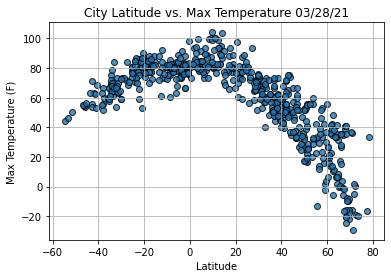

In [13]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

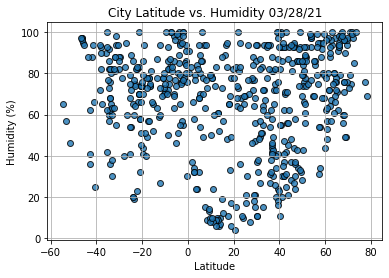

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

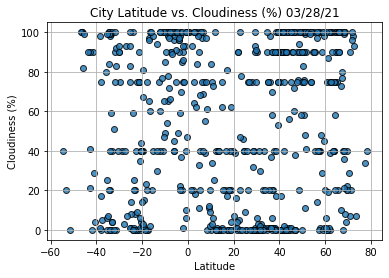

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

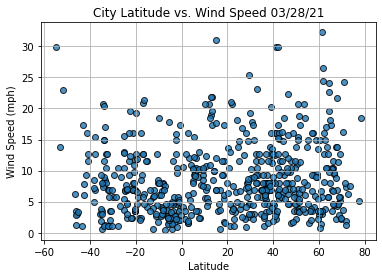

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [48]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [58]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Linear Regression for Max Temperatures

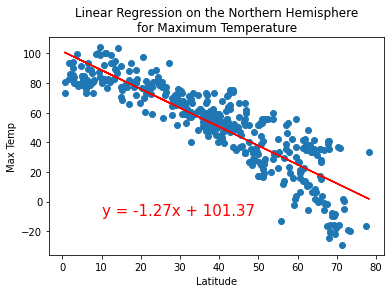

In [83]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
min_temp_offset = min(northern_hemi_df["Max Temp"]) # Need to factor cold temperatures putting Y axis below freezing
# Call the function.
plot_linear_regression(x_values, y_values,
     'Linear Regression on the Northern Hemisphere\nfor Maximum Temperature', 'Max Temp',(10,min_temp_offset + 20))

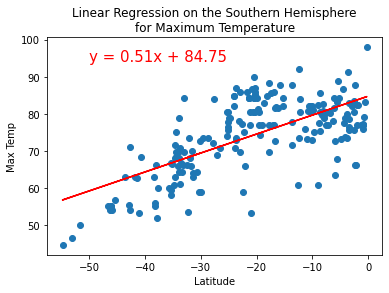

In [84]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
max_temp_offset = max(northern_hemi_df["Max Temp"]) # Need to factor cold temperatures putting Y axis below freezing
# Call the function.
plot_linear_regression(x_values, y_values,
     'Linear Regression on the Southern Hemisphere\nfor Maximum Temperature', 'Max Temp',(-50,max_temp_offset - 10))

R value on 3/28/2021 for the Northern Hemisphere is -1.27 and the Southern Hemisphere is .51, as we approach the equator 0° the temperatures become warmer.

# Linear Regression for Humidity

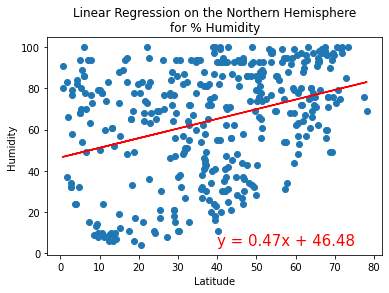

In [91]:
# Linear regression on the Northern Hemisphere Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
min_offset = min(northern_hemi_df["Humidity"]) # using lowest humidity to place annotation
# Call the function. Note x is the independent variable, y is the dependent variable
plot_linear_regression(x_values, y_values,
     'Linear Regression on the Northern Hemisphere\nfor % Humidity', 'Humidity',(40,min_offset))

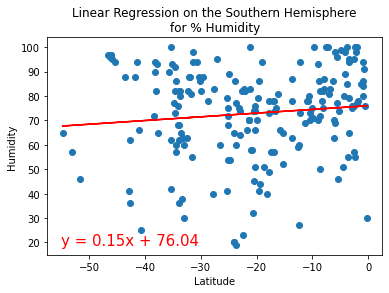

In [96]:
# Linear regression on the Southern Hemisphere Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
max_offset = min(southern_hemi_df["Humidity"]) # using lowest humidity to place annotation
# Call the function. Note x is the independent variable, y is the dependent variable
plot_linear_regression(x_values, y_values,
     'Linear Regression on the Southern Hemisphere\n' +
     'for % Humidity', 'Humidity',(-55,max_offset))

R value on 3/28/2021 is very low because the value of the Northern Hemisphere is 0.47 and the Southern Hemisphere is .15,they are not dependent on the Latitude (X axis) thus unpredictible due to changing weather patterns and available water sources

# Linear Regression on the Percent Cloudiness

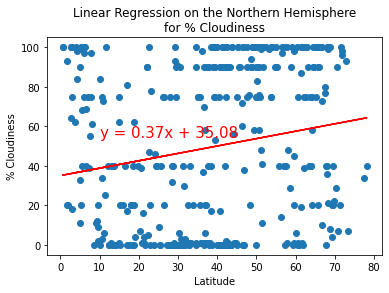

In [117]:
# Linear regression on the Northern Hemisphere Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
middle_offset = np.mean(northern_hemi_df["Cloudiness"]) + 5 # using numpy average +5 to place annotation above line 
# Call the function. Note x is the independent variable, y is the dependent variable
plot_linear_regression(x_values, y_values,
     'Linear Regression on the Northern Hemisphere\nfor % Cloudiness', '% Cloudiness',(10, middle_offset))

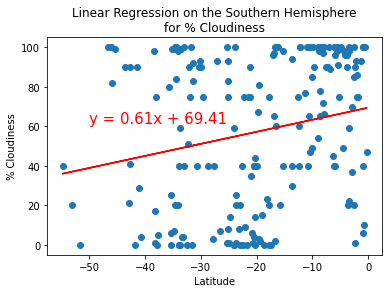

In [120]:
# Linear regression on the Southern Hemisphere Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
middle_offset = np.mean(southern_hemi_df["Cloudiness"]) + 5 # using numpy average +5 to place annotation above line 
# Call the function. Note x is the independent variable, y is the dependent variable
plot_linear_regression(x_values, y_values,
     'Linear Regression on the Southern Hemisphere\n' + 
     'for % Cloudiness', '% Cloudiness',(-50, middle_offset))

Low correlation between Latitue and percentage cloudiness since the r-values are both low

# Linear Regression for Wind Speed

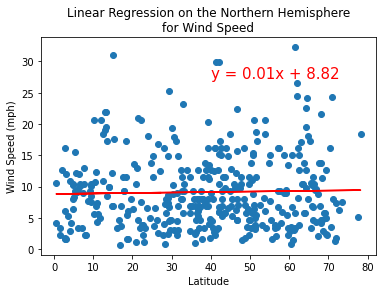

In [129]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
max_offset = max(northern_hemi_df["Wind Speed"])-5 # using highest Wind Speed to place annotation
# Call the function.
plot_linear_regression(x_values, y_values,
        'Linear Regression on the Northern Hemisphere\n' + 
        'for Wind Speed', 'Wind Speed (mph)',(40,max_offset))

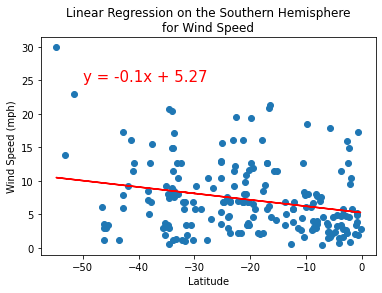

In [131]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
max_offset = max(southern_hemi_df["Wind Speed"])-5 # using highest Wind Speed to place annotation
# Call the function.
plot_linear_regression(x_values, y_values,
        'Linear Regression on the Southern Hemisphere\n' +
        'for Wind Speed', 'Wind Speed (mph)',(-50,max_offset))

Wind speed is unpredictible in both hemispheres due to a low r-value